EDA Siniestros viales

In [37]:
#Importamos las librerias a usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Se Importa los  Dataframe que vamos a trabajar

In [38]:
#importamos las hojas del Dataset que se usaran 
df_hechos = pd.read_csv('../datasets/homicidios_clean.csv')
df_victimas = pd.read_csv('../datasets/victimas_clean.csv')

In [39]:
df_hechos # visualiza el df

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,AVENIDA,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1.0,GRAL PAZ,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7.0,AVENIDA,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0.0,AVENIDA,8,-58.465039,-34.680930,MOTO-AUTO,MOTO,AUTO
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5.0,AVENIDA,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17.0,AVENIDA,7,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
691,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1.0,AUTOPISTA,9,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
692,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0.0,AVENIDA,11,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS
693,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10.0,AVENIDA,9,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS


In [40]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             695 non-null    object 
 1   N_VICTIMAS     695 non-null    int64  
 2   FECHA          695 non-null    object 
 3   AAAA           695 non-null    int64  
 4   MM             695 non-null    int64  
 5   DD             695 non-null    int64  
 6   HORA           695 non-null    object 
 7   HH             695 non-null    float64
 8   TIPO_DE_CALLE  695 non-null    object 
 9   COMUNA         695 non-null    int64  
 10  LONGITUD       695 non-null    float64
 11  LATITUD        695 non-null    float64
 12  PARTICIPANTES  695 non-null    object 
 13  VICTIMA        695 non-null    object 
 14  ACUSADO        695 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 81.6+ KB


El tipo de dato es el adecuado

In [41]:
df_hechos.describe(include='all')# Genera un resumen estadístico para todas las columnas

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO
count,695,695.000000,695,695.000000,695.000000,695.000000,695,695.000000,695,695.000000,695.000000,695.000000,695,695,695
unique,695,NaN,598,NaN,NaN,NaN,322,NaN,4,NaN,NaN,NaN,36,9,9
top,2016-0001,NaN,2018-12-18,NaN,NaN,NaN,14:00:00,NaN,AVENIDA,NaN,NaN,NaN,PEATON-PASAJEROS,MOTO,AUTO
freq,1,NaN,3,NaN,NaN,NaN,11,NaN,429,NaN,NaN,NaN,109,302,220
mean,NaN,1.030216,NaN,2018.191367,6.684892,15.920863,NaN,11.677698,NaN,7.437410,-58.441369,-34.619551,NaN,NaN,NaN
std,NaN,0.179519,NaN,1.682915,3.568189,8.635648,NaN,6.686022,NaN,4.378857,0.046215,0.035408,NaN,NaN,NaN
min,NaN,1.000000,NaN,2016.000000,1.000000,1.000000,NaN,0.000000,NaN,1.000000,-58.529942,-34.705250,NaN,NaN,NaN
25%,NaN,1.000000,NaN,2017.000000,4.000000,9.000000,NaN,6.000000,NaN,4.000000,-58.476178,-34.643608,NaN,NaN,NaN
50%,NaN,1.000000,NaN,2018.000000,7.000000,16.000000,NaN,11.000000,NaN,8.000000,-58.444513,-34.622973,NaN,NaN,NaN
75%,NaN,1.000000,NaN,2020.000000,10.000000,23.000000,NaN,17.500000,NaN,11.000000,-58.401412,-34.596003,NaN,NaN,NaN


En la sección superior, se destaca que la mayoría de las víctimas están asociadas a accidentes con motocicletas, mientras que la mayor proporción de acusados involucra vehículos tipo automóvil. Además, se observa que la combinación de participantes más frecuente es peatón-pasajero.

In [42]:
df_hechos.isnull().sum()

ID               0
N_VICTIMAS       0
FECHA            0
AAAA             0
MM               0
DD               0
HORA             0
HH               0
TIPO_DE_CALLE    0
COMUNA           0
LONGITUD         0
LATITUD          0
PARTICIPANTES    0
VICTIMA          0
ACUSADO          0
dtype: int64

En el ETL se trataron los valores faltantes y se veridicaron duplicados

Verificamos outliers 

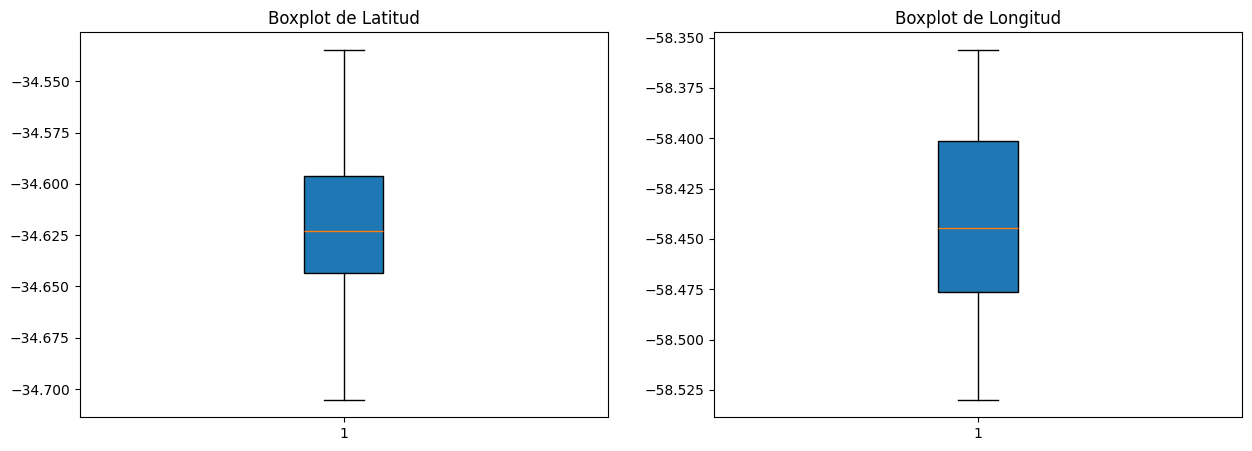

In [43]:
# Graficar boxplots con colores personalizados
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].boxplot(df_hechos['LATITUD'], patch_artist=True, boxprops=dict(facecolor='#1f77b4'))
axs[0].set_title('Boxplot de Latitud')

axs[1].boxplot(df_hechos['LONGITUD'], patch_artist=True, boxprops=dict(facecolor='#1f77b4'))
axs[1].set_title('Boxplot de Longitud')

plt.show()


Al analizar los boxplots de las columnas de latitud y longitud, no se detectan valores atípicos (outliers). Esta observación sugiere que los datos de ubicación, específicamente las coordenadas de latitud y longitud, no presentan valores inusuales o extremos que podrían indicar ubicaciones erróneas o situadas fuera de la ciudad.

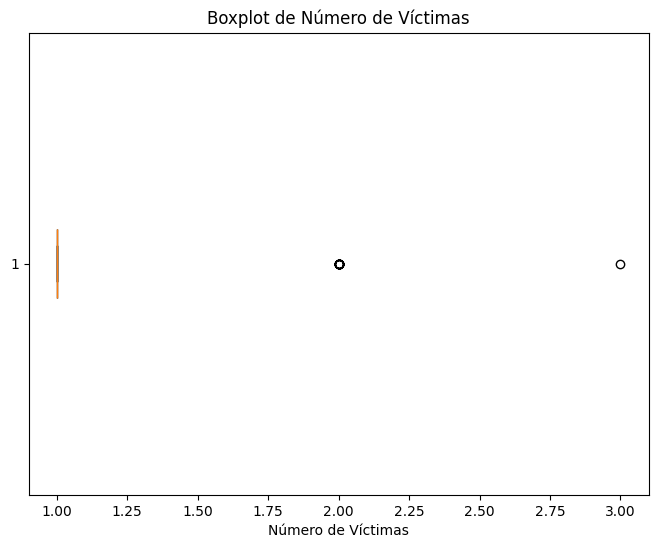

In [44]:
# Crear un boxplot para la columna 'N_VICTIMAS'
plt.figure(figsize=(8, 6))
plt.boxplot(df_hechos['N_VICTIMAS'], patch_artist=True, vert=False)

# Personalizar el gráfico
plt.title('Boxplot de Número de Víctimas')
plt.xlabel('Número de Víctimas')
plt.show()

En relación a la columna del número de víctimas, se identifican algunos valores atípicos, señalando que en ciertos casos hay un número inusualmente elevado de víctimas en un mismo accidente. Resulta crucial realizar una investigación detallada de estos casos para comprender las circunstancias que contribuyeron a un mayor número de víctimas en esos incidentes particulares.

In [45]:
df_hechos[df_hechos['N_VICTIMAS']==3]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO
169,2017-0035,3,2017-03-23,2017,3,23,05:00:00,5.0,AVENIDA,1,-58.358815,-34.611136,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO


Se verifican los accidentes por dia y hora del suceso

In [46]:
# Convierte la columna 'FECHA' a tipo datetime si no lo está
df_hechos['FECHA'] = pd.to_datetime(df_hechos['FECHA'])

In [47]:
# Crea una nueva columna 'DIA_SEMANA' que contenga el día de la semana
df_hechos['N_DIA_SEMANA'] = df_hechos['FECHA'].dt.dayofweek

In [48]:
# Lista los dias de la semana
dias_semana = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}


In [49]:
# Crear una nueva columna con los nombres de los días 
df_hechos['DIA_SEMANA'] = df_hechos['FECHA'].dt.dayofweek.map(dias_semana)

In [50]:
victimas_por_dia = df_hechos.groupby('DIA_SEMANA')['N_VICTIMAS'].mean().reset_index()

In [51]:
# Ordenar los días de la semana en función de su número (0 para lunes, 1 para martes, etc.)
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

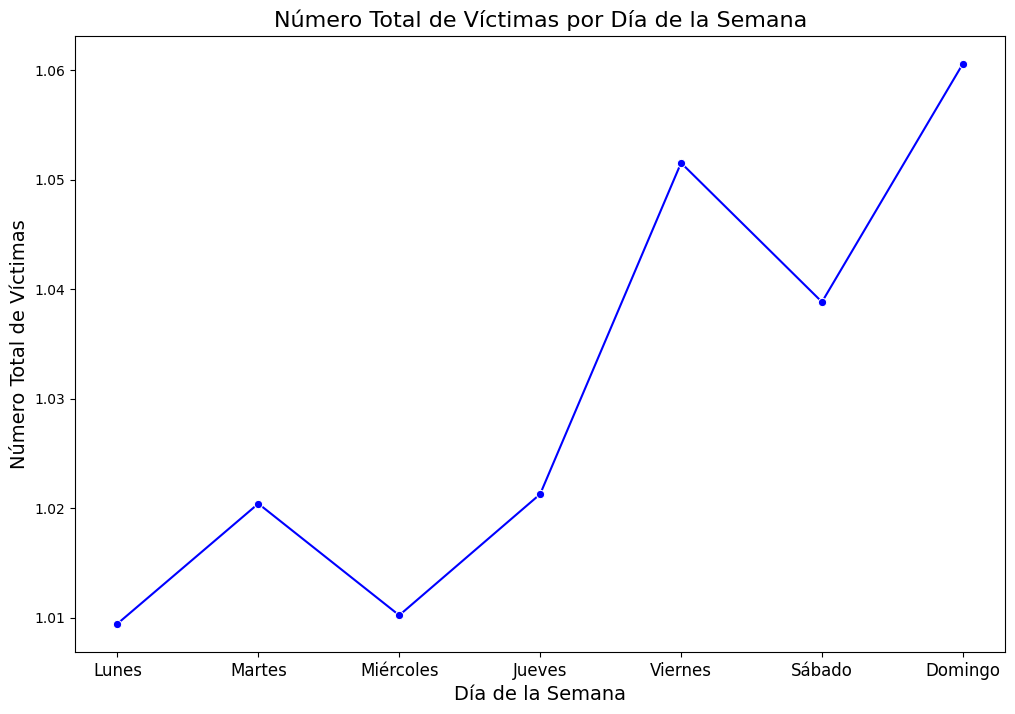

In [52]:
plt.figure(figsize=(12, 8)) # Establecer el tamaño de la figura
sns.lineplot(data=victimas_por_dia.sort_values(by='DIA_SEMANA', key=lambda x: x.map({v: i for i, v in enumerate(orden_dias)})),
x='DIA_SEMANA', y='N_VICTIMAS', color='blue', marker='o', linestyle='-')
plt.title('Número Total de Víctimas por Día de la Semana', fontsize=16) # Título del gráfico
plt.xlabel('Día de la Semana', fontsize=14) # Etiqueta del eje x
plt.ylabel('Número Total de Víctimas', fontsize=14) # Etiqueta del eje y
plt.xticks(ticks=np.arange(7), labels=orden_dias, fontsize=12) # Establecer etiquetas de los ejes x como los días de la semana en orden

plt.show()


Este gráfico ilustra una tendencia sutil pero creciente hacia el fin de semana, indicando un leve aumento en el número de víctimas a medida que nos acercamos al sábado y domingo. Esta observación sugiere que los días de fin de semana podrían presentar un mayor riesgo de accidentes con víctimas en comparación con los días laborables.

In [53]:
# Filtrar los datos para los viernes, sábados y domingos
df_weekend = df_hechos[df_hechos['DIA_SEMANA'].isin(['Viernes', 'Sábado', 'Domingo'])]  

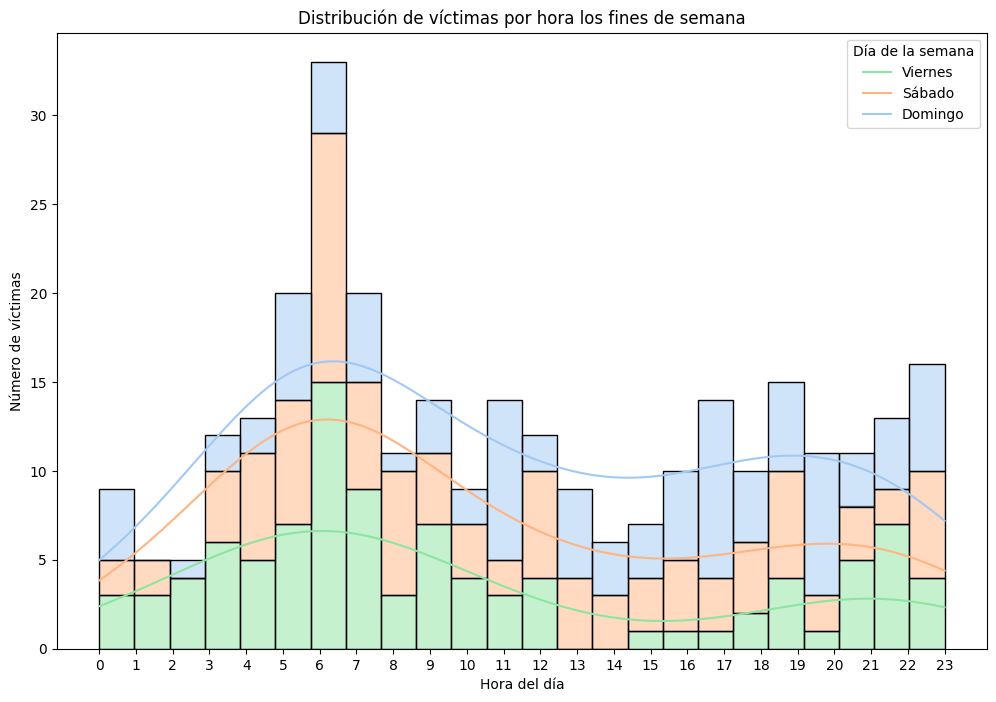

In [54]:
# Crear el gráfico de barras con colores más alegres
plt.figure(figsize=(12, 8))
sns.histplot(data=df_weekend, x='HH', bins=24, kde=True, hue='DIA_SEMANA', multiple='stack', palette='pastel')
plt.title('Distribución de víctimas por hora los fines de semana')
plt.xlabel('Hora del día')
plt.ylabel('Número de víctimas')
plt.xticks(range(0, 24))  # Mostrar todas las horas en el eje x
plt.legend(title='Día de la semana', labels=['Viernes', 'Sábado', 'Domingo'])
plt.show()

Se destaca que los sábados y domingos, específicamente entre las 5 y las 7 de la mañana, se presenta el mayor número de homicidios viales. Esto indica que durante las primeras horas del fin de semana, podría haber una mayor incidencia de incidentes viales fatales.

victimas en general

C:\Users\Willc\AppData\Local\Temp\ipykernel_1888\2298982316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='VICTIMA', data=df_hechos, palette='muted')  # Utilizar una paleta de colores más vibrantes


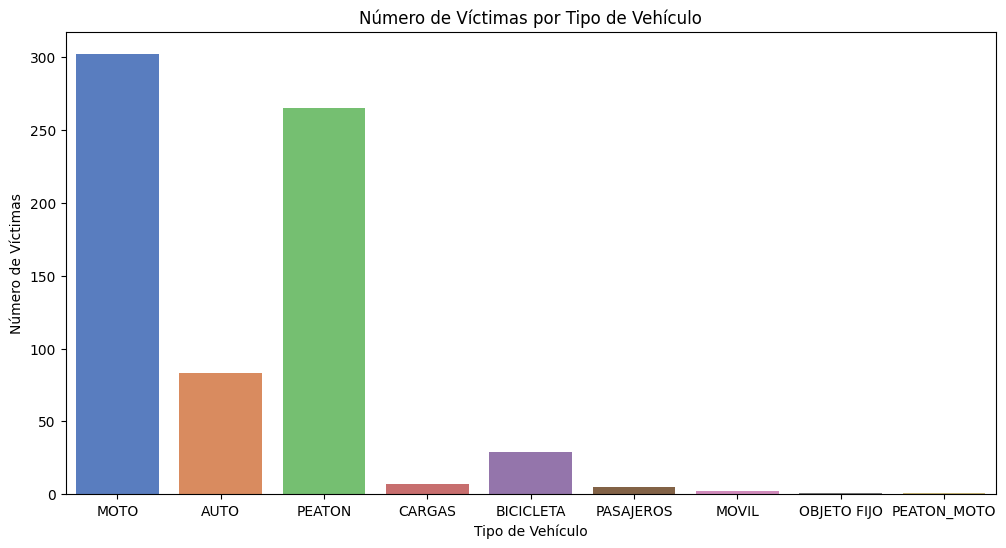

In [56]:
# Crear un gráfico de barras para el número de víctimas por hora del día
plt.figure(figsize=(12, 6))
sns.countplot(x='VICTIMA', data=df_hechos, palette='muted')  # Utilizar una paleta de colores más vibrantes
plt.title('Número de Víctimas por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Número de Víctimas'
plt.show()

Resaltar que la mayoría de las víctimas son motociclistas y peatones en el anterior gráfico

In [118]:
# Filtrar los datos para los sábados y domingos
df_weekend = df_hechos[(df_hechos['DIA_SEMANA'] == 'Sábado') | (df_hechos['DIA_SEMANA'] == 'Domingo')]

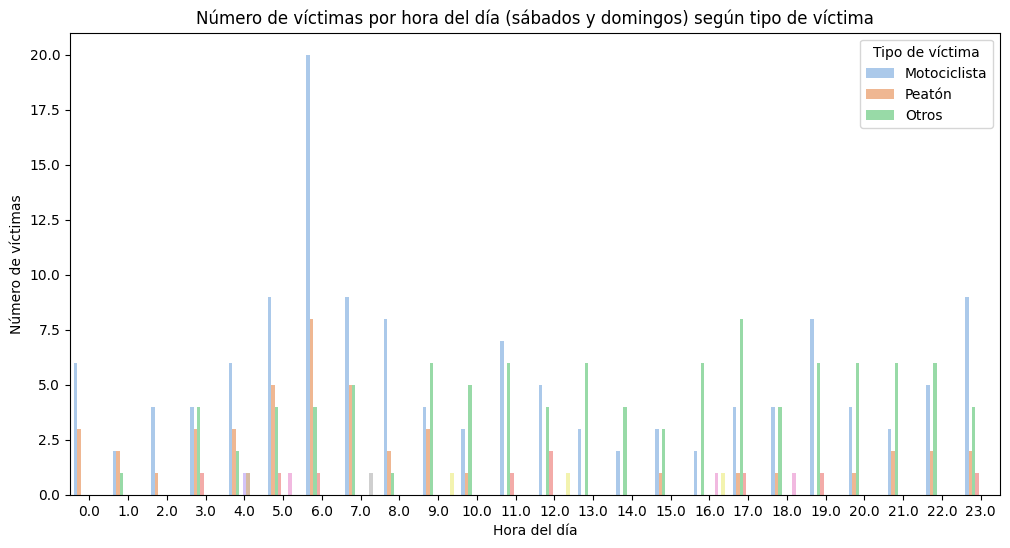

In [57]:
# Crear un gráfico de barras para el número de víctimas por hora del día (sábados y domingos) según tipo de víctima
plt.figure(figsize=(12, 6))
sns.countplot(x='HH', data=df_weekend, hue='VICTIMA', palette='pastel')  # Utilizar una paleta de colores pastel
plt.title('Número de víctimas por hora del día (sábados y domingos) según tipo de víctima')
plt.xlabel('Hora del día')
plt.ylabel('Número de víctimas')
plt.legend(title='Tipo de víctima', labels=['Motociclista', 'Peatón', 'Otros'])
plt.show()


Este análisis destaca que en los sábados y domingos, principalmente entre las 5 y las 7 de la mañana, la mayoría de las víctimas son motociclistas y peatones. Estos hallazgos subrayan la necesidad de implementar medidas específicas de seguridad vial dirigidas a estos grupos durante esas horas específicas, con el objetivo de reducir la incidencia de accidentes y garantizar un entorno más seguro en la vía pública.

Realizamos una verificación respectiva de los acusados en general

C:\Users\Willc\AppData\Local\Temp\ipykernel_1888\1196796946.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ACUSADO', data=df_hechos, palette='pastel')


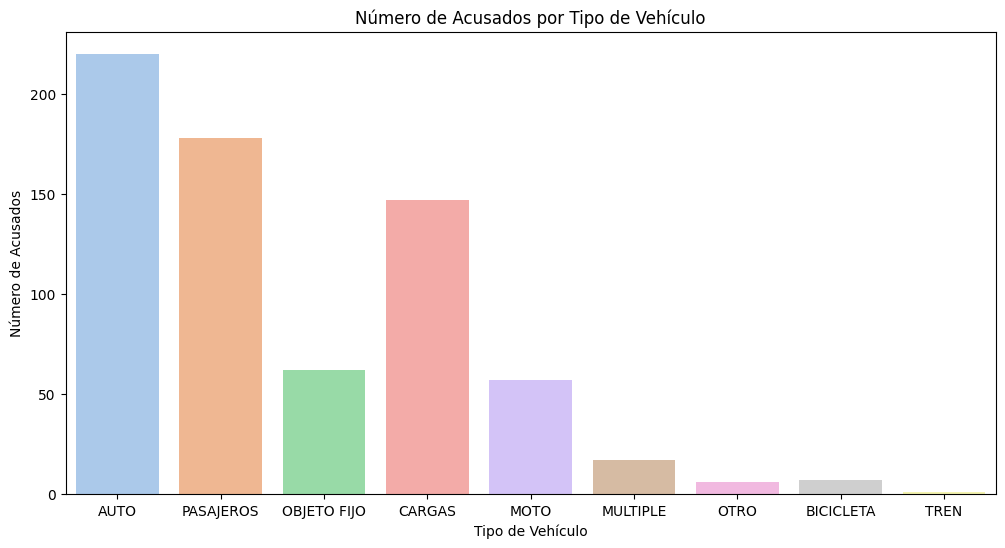

In [58]:
# Crear un gráfico de barras para el número de acusados por tipo de vehículo
plt.figure(figsize=(12, 6))
sns.countplot(x='ACUSADO', data=df_hechos, palette='pastel')
plt.title('Número de Acusados por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Número de Acusados')
plt.show()


Este gráfico nos proporciona una visión del número de acusados según el tipo de vehículo involucrado en los siniestros viales. Se observa que los autos son el tipo de vehículo más frecuentemente involucrado como acusado en comparación con otros tipos de vehículos por ende se puede evidenciar que la mayoria de acusados son autos, pasajeros y cargas

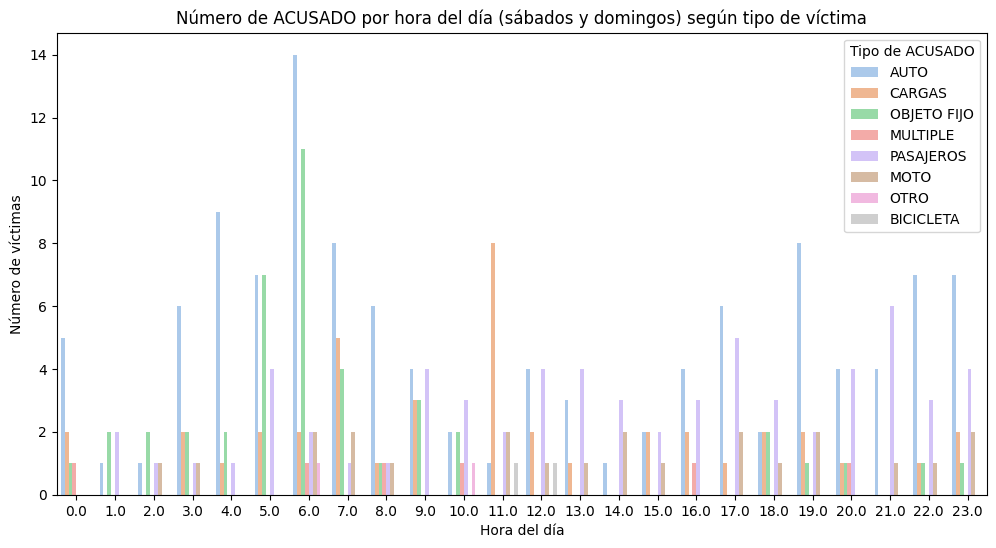

In [59]:
# Crear un gráfico de barras para el número de víctimas por hora del día
plt.figure(figsize=(12, 6))
sns.countplot(x='HH', data=df_weekend, hue='ACUSADO', palette='pastel')
plt.title('Número de ACUSADO por hora del día (sábados y domingos) según tipo de víctima')
plt.xlabel('Hora del día')
plt.ylabel('Número de víctimas')
plt.legend(title='Tipo de ACUSADO') 
plt.show()


En el análisis se destaca que durante las madrugadas de los sábados y domingos, específicamente entre las 3 y las 9 de la mañana, los principales responsables de los accidentes viales son autos y objetos fijos. Dado que las principales víctimas en estos incidentes suelen ser motociclistas y peatones, se sugiere focalizar las estrategias de seguridad vial en concientizar y proteger a estos grupos vulnerables. La implementación de medidas preventivas específicas en las primeras horas de la mañana, especialmente los fines de semana, podría contribuir significativamente a reducir la incidencia de accidentes en ese período crítico.